In [25]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
urls=("https://www.cars24.com/buy-used-car?sort=P&storeCityId=8184&pinId=800001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=2&pinId=110001",
"https://www.cars24.com/buy-used-car/?sort=P&storeCityId=2130&pinId=302001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=134&pinId=201301",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=5&pinId=122001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=2423&pinId=411001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=4709&pinId=560001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=5732&pinId=600001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=777&pinId=700001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=1692&pinId=380001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=1822&pinId=392001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=2987&pinId=462001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=769&pinId=134101",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=6105&pinId=641001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=6&pinId=121001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=132&pinId=201001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=6356&pinId=682001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=666&pinId=141001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=404&pinId=250001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=650&pinId=140301",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=2713&pinId=440001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=2598&pinId=422001",
"https://www.cars24.com/buy-used-car?sort=P&storeCityId=38&pinId=132101",
"https://www.cars24.com/buy-used-car{}/?sort=P&storeCityId=3686&pinId=500001")

In [247]:
urlss = []
prices = []
brands = []
year = []
type_ = []
km = []
owner = []
fuel = []
downpayments = []

for i in urls:
    urlss.append(i)
    page = requests.get(urlss[0])
    soup = BeautifulSoup(page.text)
    
    soup.find_all("div",class_="_7udZZ")[0].text

    #prices = []
    for i in soup.find_all("div",class_="_7udZZ"):
        prices.append(i.text)
    
    data = soup.find_all("h2",class_="_3FpCg")
    data[0].text.split(" ,")[0]
    
    #brands = []
    for i in data:
        brands.append(i.text.split(" ")[1])
        
    #year = []
    for i in data:
        year.append(i.text.split(" ")[0].split()[0])

    #type_ = []
    for i in data:
        type_.append(i.text.split("  ")[0].split()[2])

    soup.find_all("ul",class_="bVR0c")[0].text.split(" ")[0]
    

    features= soup.find_all("ul",class_="bVR0c")
    

    features[0].text

    re.findall("(\d+)\sOwner",features[0].text)

    #km = []
    for i in features:
        a = re.findall("(\d+,\d+)\skm",str(i))
        if len(a)>0:
            km.append(a[0])


    #owner = []
    for i in features:
        a = features[0].text.split("km")[1].split(" ")[0]
        if len(a)>0:
            owner.append(i.text.split("km")[1].split(" ")[0])


    #fuel = []
    for i in features:
        a = features[0].text.split("Owner")[1].split(" ")[0]
        if len(a)>0:
            fuel.append(i.text.split("Owner")[1].split(" ")[0])


    downpayment = soup.find_all("div",class_="_2HFRN")
    downpayment[0].text
    

    #downpayments = []
    for i in soup.find_all("div",class_="_2HFRN"):
        downpayments.append(i.text)

In [248]:
df = pd.DataFrame({
    "Brands":brands,
    "type_":type_ , 
     "year":year,
    "km":km,
    "fuel":fuel,
    "Prices":prices,
     "owner":owner,
    "downpayments":downpayments
})

In [249]:
df

,Brands,type_,year,km,fuel,Prices,owner,downpayments
0,MG,HECTOR,2020,"6,707",Petrol,"₹15,70,899",1st,"₹30,711/month"
1,KIA,SELTOS,2019,"15,503",Petrol,"₹15,08,899",1st,"₹29,499/month"
2,Maruti,Baleno,2016,"36,021",Petrol,"₹4,78,899",1st,"₹9,363/month"
3,Maruti,Alto,2014,"20,114",Petrol,"₹2,66,999",1st,"₹5,220/month"
4,Hyundai,i10,2013,"52,004",Petrol,"₹2,72,499",2nd,"₹5,327/month"
...,...,...,...,...,...,...,...,...
495,Honda,Brio,2013,"15,512",Petrol,"₹3,44,799",1st,"₹6,741/month"
496,Maruti,Alto,2018,"31,588",Petrol,"₹2,83,399",1st,"₹5,541/month"
497,Jeep,Compass,2018,"22,602",Diesel,"₹11,18,499",1st,"₹21,867/month"
498,Maruti,Celerio,2018,"17,885",Petrol,"₹4,46,199",1st,"₹8,723/month"


# Cleaning data

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        500 non-null    object
 1   type_         500 non-null    object
 2   year          500 non-null    object
 3   km            500 non-null    object
 4   fuel          500 non-null    object
 5   Prices        500 non-null    object
 6   owner         500 non-null    object
 7   downpayments  500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


In [321]:
inttypeyear = df['year'].astype(int)

df['year'] = inttypeyear


In [322]:


df['km']=df['km'].str.replace(',','')

inttypekm = df['km'].astype(float)

df['km'] = inttypekm

In [323]:
df['Prices']=df['Prices'].str.replace('₹','')

df['Prices']=df['Prices'].str.replace(',','')

inttypeprices = df['Prices'].astype(int)

df['Prices'] =inttypeprices

In [324]:
df['downpayments']=df['downpayments'].str.replace('₹','')

df['downpayments']=df['downpayments'].str.replace(',','')

df['downpayments']=df['downpayments'].str.replace('/','')

df['downpayments']=df['downpayments'].str.replace('month','')

inttypedownpayments = df['downpayments'].astype(int)

df['downpayments']=inttypedownpayments

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brands        500 non-null    object 
 1   type_         500 non-null    object 
 2   year          500 non-null    int32  
 3   km            500 non-null    float64
 4   fuel          500 non-null    object 
 5   Prices        500 non-null    int32  
 6   owner         500 non-null    object 
 7   downpayments  500 non-null    int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 25.5+ KB


In [11]:
df.notna().sum()

Brands          500
type_           500
year            500
km              500
fuel            500
Prices          500
owner           500
downpayments    500
dtype: int64

In [263]:
#csv file:
df.to_csv('car_df_data.csv')

# Data Analysis

In [26]:
cars24=pd.read_csv('cars_df_data.csv')

In [4]:
cars24

,Unnamed: 0,Brands,type_,year,car_age,km,fuel,Prices,owner,downpayments
0,0,MG,HECTOR,2020,2,6707.0,Petrol,1570899,1st,30711
1,1,Hyundai,Santro,2013,9,27748.0,Petrol,206799,1st,4043
2,2,KIA,SELTOS,2019,3,15503.0,Petrol,1508899,1st,29499
3,3,Maruti,Baleno,2016,6,36021.0,Petrol,478899,1st,9363
4,4,Maruti,Swift,2018,4,28502.0,Petrol,552999,1st,10811
...,...,...,...,...,...,...,...,...,...,...
495,495,Maruti,Alto,2015,7,43764.0,Petrol,241321,1st,4718
496,496,KIA,SELTOS,2019,3,7946.0,Petrol,1022999,1st,20000
497,497,Maruti,Dzire,2018,4,8242.0,Diesel,705899,2nd,13800
498,498,Maruti,Celerio,2018,4,17885.0,Petrol,426799,1st,8344


In [5]:
abs(cars24['year']-2022)

0      2
1      9
2      3
3      6
4      4
      ..
495    7
496    3
497    4
498    4
499    9
Name: year, Length: 500, dtype: int64

In [6]:
cars24.drop(['Unnamed: 0'],axis=1,inplace = True)

In [7]:
cars24

,Brands,type_,year,car_age,km,fuel,Prices,owner,downpayments
0,MG,HECTOR,2020,2,6707.0,Petrol,1570899,1st,30711
1,Hyundai,Santro,2013,9,27748.0,Petrol,206799,1st,4043
2,KIA,SELTOS,2019,3,15503.0,Petrol,1508899,1st,29499
3,Maruti,Baleno,2016,6,36021.0,Petrol,478899,1st,9363
4,Maruti,Swift,2018,4,28502.0,Petrol,552999,1st,10811
...,...,...,...,...,...,...,...,...,...
495,Maruti,Alto,2015,7,43764.0,Petrol,241321,1st,4718
496,KIA,SELTOS,2019,3,7946.0,Petrol,1022999,1st,20000
497,Maruti,Dzire,2018,4,8242.0,Diesel,705899,2nd,13800
498,Maruti,Celerio,2018,4,17885.0,Petrol,426799,1st,8344


In [27]:
cars24['Brands'].value_counts()

Maruti     250
Hyundai    100
KIA         50
MG          25
Toyota      25
Renault     25
Honda       25
Name: Brands, dtype: int64

In [238]:
cars24['type_'].value_counts()

Alto       75
SELTOS     50
Baleno     50
Celerio    50
HECTOR     25
Santro     25
Swift      25
i10        25
Verna      25
Etios      25
Elite      25
Wagon      25
Kwid       25
Dzire      25
Brio       25
Name: type_, dtype: int64

In [239]:
cars24['year'].value_counts()

2013    75
2016    75
2018    75
2015    75
2020    50
2019    50
2014    25
2011    25
2012    25
2017    25
Name: year, dtype: int64

In [240]:
cars24['km'].value_counts()

6707.0     25
27748.0    25
17885.0    25
8242.0     25
7946.0     25
43764.0    25
29068.0    25
36551.0    25
24432.0    25
39225.0    25
6880.0     25
33567.0    25
45094.0    25
58939.0    25
52004.0    25
20114.0    25
28502.0    25
36021.0    25
15503.0    25
42217.0    25
Name: km, dtype: int64

In [241]:
cars24['fuel'].value_counts()

Petrol    475
Diesel     25
Name: fuel, dtype: int64

In [242]:
cars24['owner'].value_counts()

1st    350
2nd    150
Name: owner, dtype: int64

# Analysis using Describe()

In [243]:
cars24.describe()

,year,car_age,km,Prices,downpayments
count,500.00000,500.00000,500.000000,5.000000e+02,500.000000
mean,2015.90000,6.10000,29020.450000,5.306951e+05,10375.250000
std,2.62751,2.62751,15142.474445,3.862476e+05,7551.079883
min,2011.00000,2.00000,6707.000000,2.067990e+05,4043.000000
25%,2013.75000,4.00000,17289.500000,2.711240e+05,5300.250000
50%,2016.00000,6.00000,28785.000000,3.985490e+05,7792.000000
75%,2018.00000,8.25000,39973.000000,5.591990e+05,10932.250000
max,2020.00000,11.00000,58939.000000,1.570899e+06,30711.000000


In [30]:
cars24['Brands'].describe()

count        500
unique         7
top       Maruti
freq         250
Name: Brands, dtype: object

In [51]:
cars24['type_'].describe()

count      500
unique      14
top       Alto
freq       100
Name: type_, dtype: object

In [52]:
cars24['year'].describe()

count     500.00000
mean     2016.25000
std         2.73907
min      2011.00000
25%      2014.75000
50%      2016.00000
75%      2018.25000
max      2021.00000
Name: year, dtype: float64

In [270]:
cars24['car_age'].describe()

count    500.00000
mean       6.10000
std        2.62751
min        2.00000
25%        4.00000
50%        6.00000
75%        8.25000
max       11.00000
Name: car_age, dtype: float64

In [53]:
cars24['km'].describe()

count      500.000000
mean     36185.600000
std      24307.913293
min       6707.000000
25%      19864.500000
50%      31317.500000
75%      44096.500000
max      99358.000000
Name: km, dtype: float64

In [31]:
cars24['fuel'].describe()

count        500
unique         2
top       Petrol
freq         475
Name: fuel, dtype: object

In [32]:
cars24['owner'].describe()

count     500
unique      2
top       1st
freq      375
Name: owner, dtype: object

In [33]:
cars24['Prices'].describe()

count    5.000000e+02
mean     5.214001e+05
std      3.815448e+05
min      2.413210e+05
25%      2.711240e+05
50%      3.844990e+05
75%      5.220990e+05
max      1.570899e+06
Name: Prices, dtype: float64

In [34]:
cars24['downpayments'].describe()

count      500.000000
mean     10193.550000
std       7459.233706
min       4718.000000
25%       5300.250000
50%       7517.000000
75%      10207.250000
max      30711.000000
Name: downpayments, dtype: float64

In [271]:
cars24.head()

,Brands,type_,year,car_age,km,fuel,Prices,owner,downpayments
0,MG,HECTOR,2020,2,6707.0,Petrol,1570899,1st,30711
1,Hyundai,Santro,2013,9,27748.0,Petrol,206799,1st,4043
2,KIA,SELTOS,2019,3,15503.0,Petrol,1508899,1st,29499
3,Maruti,Baleno,2016,6,36021.0,Petrol,478899,1st,9363
4,Maruti,Swift,2018,4,28502.0,Petrol,552999,1st,10811


In [272]:
cars24.tail(55)

,Brands,type_,year,car_age,km,fuel,Prices,owner,downpayments
445,Maruti,Alto,2014,8,20114.0,Petrol,266999,1st,5220
446,Hyundai,i10,2013,9,52004.0,Petrol,272499,2nd,5327
447,Hyundai,Verna,2011,11,58939.0,Petrol,371599,2nd,7265
448,Toyota,Etios,2012,10,45094.0,Petrol,253899,2nd,4964
449,Maruti,Celerio,2017,5,33567.0,Petrol,375899,1st,7349
450,Hyundai,Elite,2015,7,6880.0,Petrol,577799,1st,11296
451,Maruti,Wagon,2016,6,39225.0,Petrol,305399,2nd,5971
452,Maruti,Alto,2015,7,24432.0,Petrol,254399,1st,4974
453,Renault,Kwid,2020,2,36551.0,Petrol,421199,1st,8235
454,Maruti,Baleno,2016,6,29068.0,Petrol,511799,1st,10006


# Univariate analysis

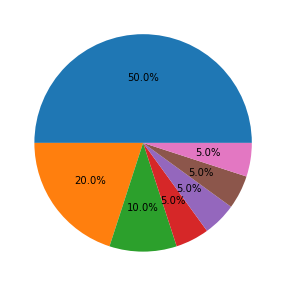

In [37]:
plt.figure(figsize=(5,5))

plt.pie(cars24['Brands'].value_counts(),autopct='%.1f%%')
plt.show()

Here, we can observe that maruti cars are the most sold cars in this website around 50%

<AxesSubplot:>

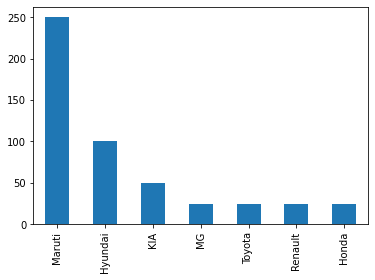

In [13]:
cars24['Brands'].value_counts().plot(kind = 'bar')

Here we observed "Maruthi" cars has highest numbers of used cars in this website

<AxesSubplot:>

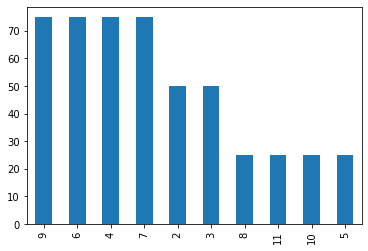

In [278]:
cars24['car_age'].value_counts().plot(kind = 'bar')

Here, x-axis=car_age and y-axis=number of cars. we can observe more than 70 cars in between 7 to 9 years old.

C:\Users\shiva karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


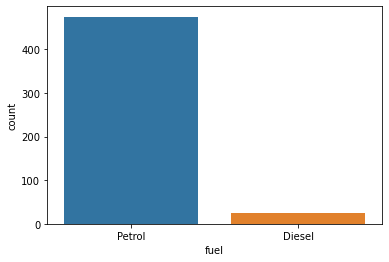

In [15]:
sns.countplot(cars24['fuel'])
plt.show()

This is a countplot, which is described about the petrol and diesel and we can obsersve that, petrol cars are dominating the diesel cars

# Bi-variate analysis

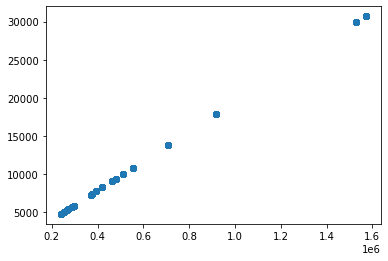

In [131]:
x=cars24['Prices']
y=cars24["downpayments"]
plt.scatter(x, y)

<AxesSubplot:xlabel='Brands'>

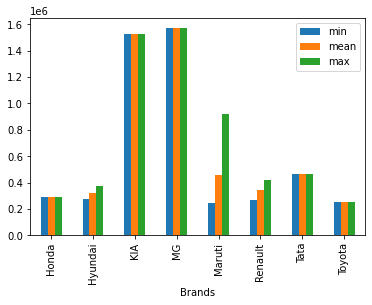

In [120]:
cars24.groupby(['Brands'])['Prices'].agg({'min','mean','max'}).plot(kind = 'bar')

Here we observed every car brand has different prices and MG has maximum prices, And we observed every car brand has toyota and maruti has minimum prices,These values observed by Bar_plot.

<AxesSubplot:xlabel='owner', ylabel='Prices'>

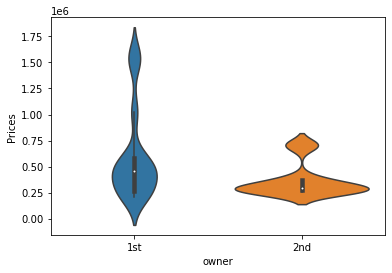

In [24]:
sns.violinplot(x=cars24["owner"], y=cars24["Prices"])


Here, we can observe the prices variation according to the 1st owner and second owner using violin plot

<AxesSubplot:xlabel='Prices', ylabel='Density'>

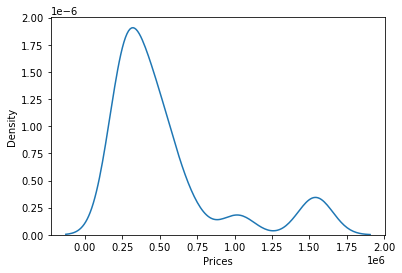

In [319]:
sns.kdeplot(cars24['Prices'])

Here, we can observe the prices variation considering its density.

# Multi-variate analysis

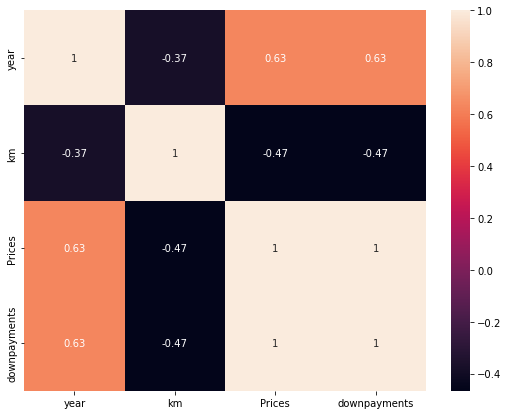

In [130]:
plt.figure(figsize = (9,7))
sns.heatmap(cars24.corr(),annot=True);

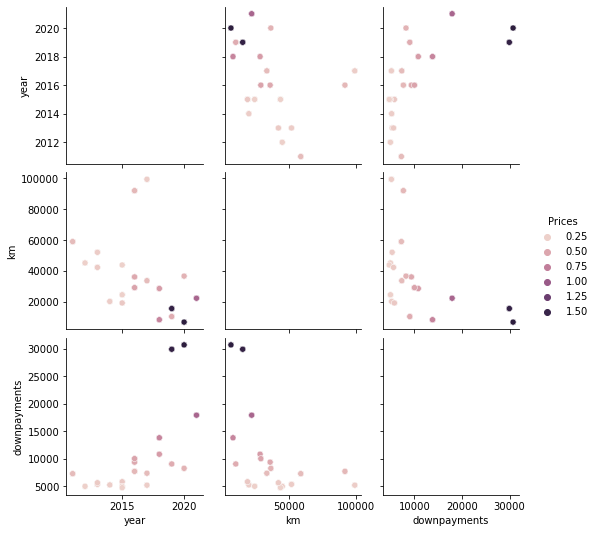

In [142]:
sns.pairplot(data=cars24,hue='Prices')
plt.show()

<AxesSubplot:xlabel='Prices', ylabel='downpayments'>

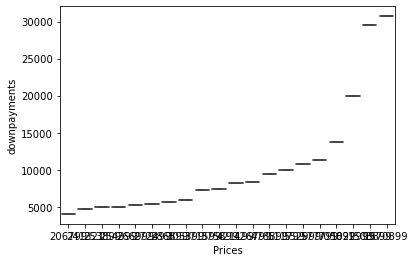

In [10]:

sns.boxplot( x=cars24["Prices"], y=cars24["downpayments"] )

In [149]:
cars24.columns


Index(['Brands', 'type_', 'year', 'km', 'fuel', 'Prices', 'owner',
       'downpayments'],
      dtype='object')

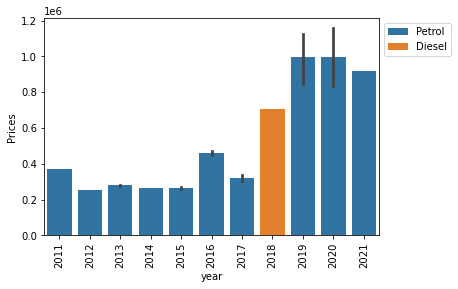

In [161]:
sns.barplot(x='year', y ='Prices',data=cars24,hue='fuel',dodge=False)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

This is a multi variate graph, which describes about the year, prices and the fuel variation. Depending on the year, the prices are fluctuating according to the petrol and diesel cars and we can observe in the year 2018, diesel cars are the most selling cars.

# Problem statement 

In [296]:
popular_models = cars24.groupby('Brands').type_.value_counts().groupby(level=0).nlargest().to_frame()
popular_models

type_
Brands  Brands  type_         
Honda   Honda   Brio        25
Hyundai Hyundai Elite       25
                Santro      25
                Verna       25
                i10         25
KIA     KIA     SELTOS      50
MG      MG      HECTOR      25
Maruti  Maruti  Alto        75
                Baleno      50
                Celerio     50
                Dzire       25
                Swift       25
Renault Renault Kwid        25
Toyota  Toyota  Etios       25

In [314]:
price=cars24[cars24["Prices"]<=300000]
price

,Unnamed: 0,Brands,type_,year,car_age,km,fuel,Prices,owner,downpayments
1,1,Hyundai,Santro,2013,9,27748.0,Petrol,206799,1st,4043
5,5,Maruti,Alto,2014,8,20114.0,Petrol,266999,1st,5220
6,6,Hyundai,i10,2013,9,52004.0,Petrol,272499,2nd,5327
8,8,Toyota,Etios,2012,10,45094.0,Petrol,253899,2nd,4964
12,12,Maruti,Alto,2015,7,24432.0,Petrol,254399,1st,4974
...,...,...,...,...,...,...,...,...,...,...
486,486,Hyundai,i10,2013,9,52004.0,Petrol,272499,2nd,5327
488,488,Toyota,Etios,2012,10,45094.0,Petrol,253899,2nd,4964
492,492,Maruti,Alto,2015,7,24432.0,Petrol,254399,1st,4974
495,495,Maruti,Alto,2015,7,43764.0,Petrol,241321,1st,4718


In [315]:
price.groupby(['year'])['Brands'].describe()

,count,unique,top,freq
year,,,,
2012,25,1,Toyota,25
2013,75,2,Hyundai,50
2014,25,1,Maruti,25
2015,50,1,Maruti,50


# Conclusion

A practical processor of scraping the data using some libraries like BeautifulSoup,RegEX,seaborn,matplotlib and requests by cleaning data and exploration data analysis.

In this project, I have analysed about the used cars taken from the website "Cars24". Using this analysis, we can find out the best match according to the customer demands and requirements. 